In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns = california_housing.feature_names)

df['Target'] = california_housing.target

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [5]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [6]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


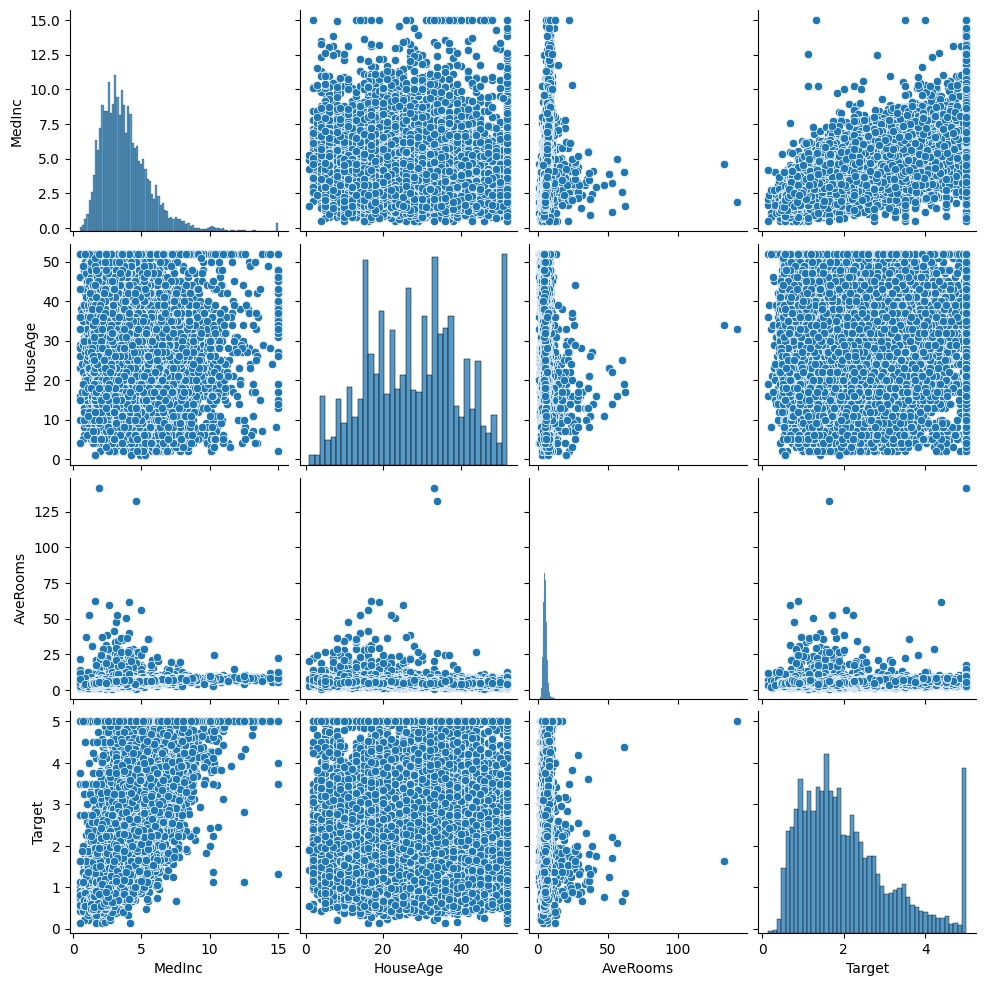

In [7]:
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'Target']])
plt.show()

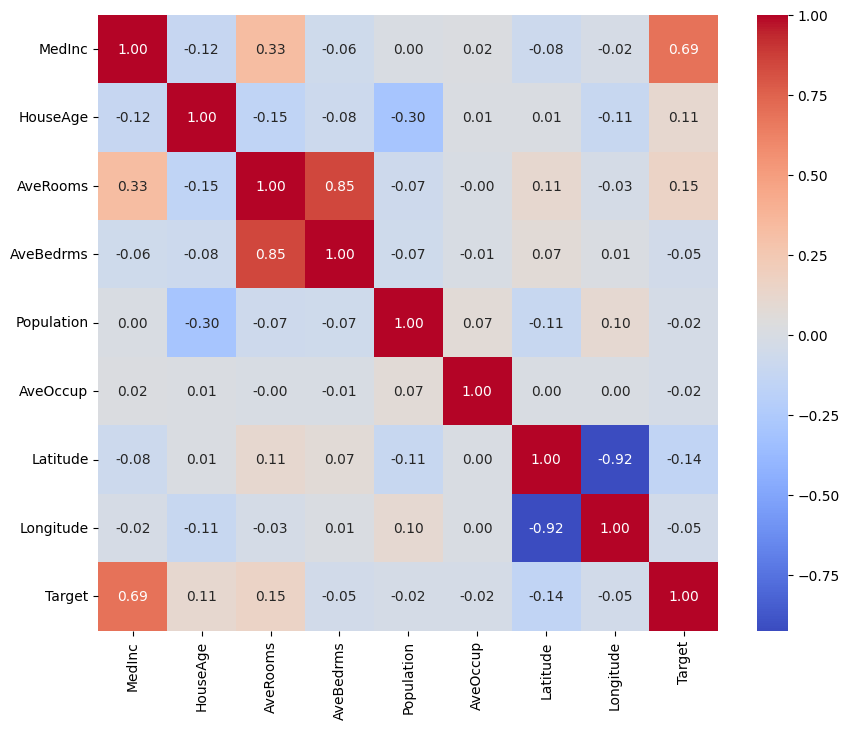

In [8]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt= '.2f')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop('Target', axis=1)
y = df['Target']

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Use get_feature_names_out() instead of get_feature_names()
poly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
print(poly_features.head())

     1    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  1.0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597   
1  1.0  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512   
2  1.0  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843   
3  1.0  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329   
4  1.0 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616   

   Latitude  Longitude  MedInc^2  ...  Population^2  Population AveOccup  \
0  1.052548  -1.327835  5.497926  ...      0.949511             0.048328   
1  1.043185  -1.322844  5.439334  ...      0.742077            -0.079694   
2  1.038503  -1.332827  3.178017  ...      0.673675             0.021211   
3  1.038503  -1.337818  0.870428  ...      0.586799             0.038554   
4  1.038503  -1.337818  0.000166  ...      0.577367             0.065055   

   Population Latitude  Population Longitude  AveOccup^2  AveOccup Latitude  \
0            -1.025633   

Improving the performance using Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Now X_train and y_train are defined and can be used here

RandomForestRegressor(random_state=42)

In [15]:
y_pred_rf = rf_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import necessary functions

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared (R^2): {r2_rf}")

Random Forest - Mean Absolute Error: 0.3329038356104652
Random Forest - Mean Squared Error: 0.2604338990033283
Random Forest - R-squared (R^2): 0.8012575437685597


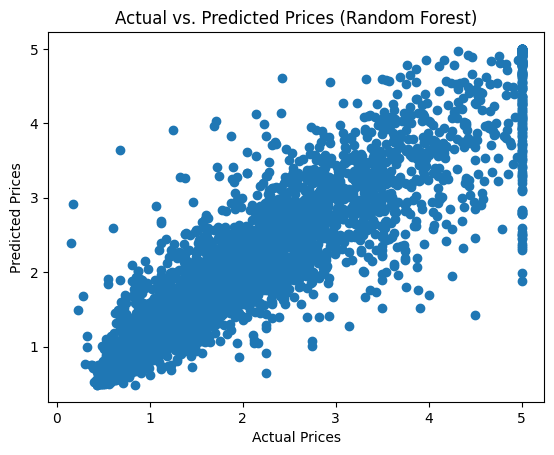

In [19]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Random Forest)")
plt.show()

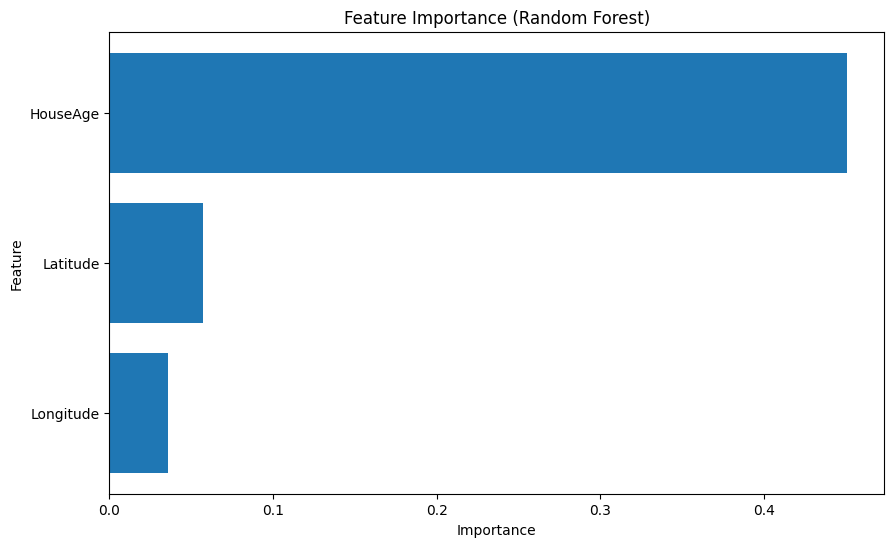

In [20]:
importances = rf_model.feature_importances_
num_features = X.shape[1]


sorted_indices = importances.argsort()[-(min(num_features, len(importances))):]

sorted_indices = [i for i in sorted_indices if i < len(X.columns)]

plt.figure(figsize=(10, 6))

plt.barh(X.columns[sorted_indices], importances[sorted_indices])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()